<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2022/blob/main/09-neural-networks/PyTorch_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to PyTorch 🔥
This tutorial is based on [official docs](https://pytorch.org/docs/stable/index.html) and [YSDA notebooks](https://github.com/yandexdataschool/Practical_DL), check them on your own as well. 

If you have existing code with data stored in NumPy
ndarrays, you may wish to express that same data as PyTorch tensors,
whether to take advantage of PyTorch’s GPU acceleration, or its
efficient abstractions for building ML models. You may think of PyTorch as Numpy with autodiff. Check the repo: https://github.com/torch/torch7/wiki/Torch-for-Numpy-users

In [1]:
import numpy as np
import torch

numpy_array = np.ones((2, 3))
print(numpy_array)

pytorch_tensor = torch.from_numpy(numpy_array)
print(pytorch_tensor)

[[1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


PyTorch creates a tensor of the same shape and containing the same data
as the NumPy array, going so far as to keep NumPy’s default 64-bit float
data type.

The conversion can just as easily go the other way:

In [2]:
torch.cuda.is_available()

True

In [3]:
pytorch_rand = torch.rand(2, 3)
print(pytorch_rand)

numpy_rand = pytorch_rand.numpy()
print(numpy_rand)

tensor([[0.5672, 0.9481, 0.9861],
        [0.4687, 0.5990, 0.3122]])
[[0.5671816  0.9481187  0.9860838 ]
 [0.46865284 0.5990394  0.31221515]]


It is important to know that these converted objects are using the same underlying memory as their source objects, meaning that changes to one are reflected in the other:



In [4]:
numpy_array[1, 1] = 23
print(pytorch_tensor)

pytorch_rand[1, 1] = 17
print(numpy_rand)

tensor([[ 1.,  1.,  1.],
        [ 1., 23.,  1.]], dtype=torch.float64)
[[ 0.5671816   0.9481187   0.9860838 ]
 [ 0.46865284 17.          0.31221515]]


## PyTorch Tensors

Let’s see a few basic tensor manipulations. First, just a few of the
ways to create tensors:




In [5]:
x = torch.empty(3, 4)
print(type(x))
print(x)

<class 'torch.Tensor'>
tensor([[-6.0242e-36,  1.8553e-42,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])


You will probably see some random-looking values when printing your
   tensor. The ``torch.empty()`` call allocates memory for the tensor,
   but does not initialize it with any values - so what you’re seeing is
   whatever was in memory at the time of allocation.

More often than not, you’ll want to initialize your tensor with some
value. Common cases are all zeros, all ones, or random values, and the
``torch`` module provides factory methods for all of these:


In [6]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [7]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


It’s common to initialize learning weights randomly, often with a
specific seed for the PRNG for reproducibility of results:




In [8]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print('A random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\nA different random tensor:')
print(r2) # new values

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nSame as r1:')
print(r3) # repeats values of r1 because of re-seed

A random tensor:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

A different random tensor:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

Same as r1:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


PyTorch tensors perform arithmetic operations intuitively. Tensors of
similar shapes may be added, multiplied, etc. Operations with scalars
are distributed over the tensor:




In [9]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2 # every element is multiplied by 2
print(twos)

threes = ones + twos       # addition allowed because shapes are similar
print(threes)              # tensors are added element-wise
print(threes.shape)        # this has the same dimensions as input tensors

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
# uncomment this line to get a runtime error
# r3 = r1 + r2

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


Here’s a small sample of the mathematical operations available:




In [10]:
r = (torch.rand(2, 2) - 0.5) * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

A random matrix, r:
tensor([[ 0.9956, -0.2232],
        [ 0.3858, -0.6593]])

Absolute value of r:
tensor([[0.9956, 0.2232],
        [0.3858, 0.6593]])

Inverse sine of r:
tensor([[ 1.4775, -0.2251],
        [ 0.3961, -0.7199]])

Determinant of r:
tensor(-0.5703)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.8353, -0.5497],
        [-0.5497,  0.8353]]),
S=tensor([1.1793, 0.4836]),
V=tensor([[-0.8851, -0.4654],
        [ 0.4654, -0.8851]]))

Average and standard deviation of r:
(tensor(0.7217), tensor(0.1247))

Maximum value of r:
tensor(0.9956)


## Tensor Data Types

Setting the datatype of a tensor is possible a couple of ways:

In [11]:
a = torch.ones((2, 3), dtype=torch.int16)
print(a)

b = torch.rand((2, 3), dtype=torch.float64) * 20.
print(b)

c = b.to(torch.int32)
print(c)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
tensor([[ 2.1505, 19.6913,  0.9956],
        [ 1.4148,  5.8364, 11.2406]], dtype=torch.float64)
tensor([[ 2, 19,  0],
        [ 1,  5, 11]], dtype=torch.int32)


You may have also spotted that we went from specifying the tensor’s
shape as a series of integer arguments, to grouping those arguments in a
tuple. This is not strictly necessary - PyTorch will take a series of
initial, unlabeled integer arguments as a tensor shape - but when adding
the optional arguments, it can make your intent more readable.

The other way to set the datatype is with the ``.to()`` method. In the
cell above, we create a random floating point tensor ``b`` in the usual
way. Following that, we create ``c`` by converting ``b`` to a 32-bit
integer with the ``.to()`` method. Note that ``c`` contains all the same
values as ``b``, but truncated to integers.

Available data types include:

-  ``torch.bool``
-  ``torch.int8``
-  ``torch.uint8``
-  ``torch.int16``
-  ``torch.int32``
-  ``torch.int64``
-  ``torch.half``
-  ``torch.float``
-  ``torch.double``
-  ``torch.bfloat``

## [Math & Logic](https://pytorch.org/docs/stable/torch.html#math-operations) with PyTorch Tensors

Let’s look at basic arithmetic first, and how tensors interact with
simple scalars:

In [12]:
# common functions
a = torch.rand(2, 4) * 2 - 1
print('Common functions:')
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

# introduce pi to PyTorch
torch.pi = torch.acos(torch.zeros(1)).item() * 2
# trigonometric functions and their inverses
angles = torch.tensor([0, torch.pi / 4, torch.pi / 2, 3 * torch.pi / 4])
sines = torch.sin(angles)
inverses = torch.asin(sines)
print('\nSine and arcsine:')
print(angles)
print(sines)
print(inverses)

# bitwise operations
print('\nBitwise XOR:')
b = torch.tensor([1, 5, 11])
c = torch.tensor([2, 7, 10])
print(torch.bitwise_xor(b, c))

# comparisons:
print('\nBroadcasted, element-wise equality comparison:')
d = torch.tensor([[1., 2.], [3., 4.]])
e = torch.ones(1, 2)  # many comparison ops support broadcasting!
print(torch.eq(d, e)) # returns a tensor of type bool

# reductions:
print('\nReduction ops:')
print(torch.max(d))        # returns a single-element tensor
print(torch.max(d).item()) # extracts the value from the returned tensor
print(torch.mean(d))       # average
print(torch.std(d))        # standard deviation
print(torch.prod(d))       # product of all numbers
print(torch.unique(torch.tensor([1, 2, 1, 2, 1, 2]))) # filter unique elements

# vector and linear algebra operations
v1 = torch.tensor([1., 0., 0.])         # x unit vector
v2 = torch.tensor([0., 1., 0.])         # y unit vector
m1 = torch.rand(2, 2)                   # random matrix
m2 = torch.tensor([[3., 0.], [0., 3.]]) # three times identity matrix

print('\nVectors & Matrices:')
print(torch.cross(v2, v1)) # negative of z unit vector (v1 x v2 == -v2 x v1)
print(m1)
m3 = torch.matmul(m1, m2)
print(m3)                  # 3 times m1
print(torch.svd(m3))       # singular value decomposition

Common functions:
tensor([[0.8901, 0.5283, 0.6041, 0.3345],
        [0.2291, 0.1998, 0.0026, 0.8793]])
tensor([[1., -0., -0., -0.],
        [1., 1., 1., 1.]])
tensor([[ 0., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.]])
tensor([[ 0.5000, -0.5000, -0.5000, -0.3345],
        [ 0.2291,  0.1998,  0.0026,  0.5000]])

Sine and arcsine:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7854, 1.5708, 0.7854])

Bitwise XOR:
tensor([3, 2, 1])

Broadcasted, element-wise equality comparison:
tensor([[ True, False],
        [False, False]])

Reduction ops:
tensor(4.)
4.0
tensor(2.5000)
tensor(1.2910)
tensor(24.)
tensor([1, 2])

Vectors & Matrices:
tensor([ 0.,  0., -1.])
tensor([[0.8656, 0.5207],
        [0.6865, 0.3614]])
tensor([[2.5968, 1.5620],
        [2.0594, 1.0842]])
torch.return_types.svd(
U=tensor([[-0.7932, -0.6089],
        [-0.6089,  0.7932]]),
S=tensor([3.8196, 0.1051]),
V=tensor([[-0.8676,  0.4972],
        [-0.4972, -0.8676]]))


Most binary operations on tensors will return a third, new tensor. When
we say ``c = a * b`` (where ``a`` and ``b`` are tensors), the new tensor
``c`` will occupy a region of memory distinct from the other tensors.

There are times, though, that you may wish to alter a tensor in place -
for example, if you’re doing an element-wise computation where you can
discard intermediate values. For this, most of the math functions have a
version with an appended underscore (``_``) that will alter a tensor in
place.




In [13]:
a = torch.tensor([0, torch.pi / 4, torch.pi / 2, 3 * torch.pi / 4])
print('a:')
print(a)
print(torch.sin(a))   # this operation creates a new tensor in memory
print(a)              # a has not changed

b = torch.tensor([0, torch.pi / 4, torch.pi / 2, 3 * torch.pi / 4])
print('\nb:')
print(b)
print(torch.sin_(b))  # note the underscore
print(b)              # b has changed

a = torch.ones(2, 2)
b = torch.rand(2, 2)

print('\nBefore:')
print(a)
print(b)
print('\nAfter adding:')
print(a.add_(b))
print(a)
print(b)
print('\nAfter multiplying')
print(b.mul_(b))
print(b)

a:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7854, 1.5708, 2.3562])

b:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7071, 1.0000, 0.7071])

Before:
tensor([[1., 1.],
        [1., 1.]])
tensor([[0.6493, 0.2633],
        [0.4762, 0.0548]])

After adding:
tensor([[1.6493, 1.2633],
        [1.4762, 1.0548]])
tensor([[1.6493, 1.2633],
        [1.4762, 1.0548]])
tensor([[0.6493, 0.2633],
        [0.4762, 0.0548]])

After multiplying
tensor([[0.4216, 0.0693],
        [0.2268, 0.0030]])
tensor([[0.4216, 0.0693],
        [0.2268, 0.0030]])


## Moving to GPU

One of the major advantages of PyTorch is its robust acceleration on
CUDA-compatible Nvidia GPUs. (“CUDA” stands for *Compute Unified Device
Architecture*, which is Nvidia’s platform for parallel computing.) So
far, everything we’ve done has been on CPU. 

First, we should check whether a GPU is available, with the
``is_available()`` method.
If you do not have a CUDA-compatible GPU and CUDA drivers installed, the executable cells in this section will not execute any GPU-related code.

In [14]:
if torch.cuda.is_available():
    print('We have a GPU!')
else:
    print('Sorry, CPU only.')

We have a GPU!


Once we’ve determined that one or more GPUs is available, we need to put our data someplace where the GPU can see it. Your CPU does computation on data in your computer’s RAM. Your GPU has dedicated memory attached to it. Whenever you want to perform a computation on a device, you must move all the data needed for that computation to memory accessible by that device.

By default, new tensors are created on the CPU, so we have to specify
when we want to create our tensor on the GPU with the optional
``device`` argument. You can see when we print the new tensor, PyTorch
informs us which device it’s on (if it’s not on CPU).

As a coding practice, specifying our devices everywhere with string
constants is pretty fragile. In an ideal world, your code would perform
robustly whether you’re on CPU or GPU hardware. You can do this by
creating a device handle that can be passed to your tensors instead of a
string:


In [15]:
if torch.cuda.is_available():
    my_device = torch.device('cuda')
else:
    my_device = torch.device('cpu')
print('Device: {}'.format(my_device))

x = torch.rand(2, 2, device=my_device)
print(x)

Device: cuda
tensor([[0.3344, 0.2640],
        [0.2119, 0.0582]], device='cuda:0')


In order to do computation involving two or
more tensors, *all of the tensors must be on the same device*.

If you have an existing tensor living on one device, you can move it to
another with the ``to()`` method. The following line of code creates a
tensor on CPU, and moves it to whichever device handle you acquired in
the previous cell.

In [16]:
y = torch.rand(2, 2)
y = y.to(my_device)


## The Fundamentals of Autograd

PyTorch’s *Autograd* feature is part of what make PyTorch flexible and
fast for building machine learning projects. It allows for the rapid and
easy computation of multiple partial derivatives (also referred to as
*gradients)* over a complex computation. This operation is central to
backpropagation-based neural network learning.

The power of autograd comes from the fact that it traces your
computation dynamically *at runtime,* meaning that if your model has
decision branches, or loops whose lengths are not known until runtime,
the computation will still be traced correctly, and you’ll get correct
gradients to drive learning. 



In training a model, we want to minimize the loss. In the idealized case
of a perfect model, that means adjusting its learning weights - that is,
the adjustable parameters of the function - such that loss is zero for
all inputs. In the real world, it means an iterative process of nudging
the learning weights until we see that we get a tolerable loss for a
wide variety of inputs.

Let’s start with a straightforward example: we’ll create an input tensor full of evenly spaced values on the
interval $[0, 2{\pi}]$, and specify ``requires_grad=True``. (Like
most functions that create tensors, ``torch.linspace()`` accepts an
optional ``requires_grad`` option.) Setting this flag means that in
every computation that follows, autograd will be accumulating the
history of the computation in the output tensors of that computation.



In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [25]:
a = torch.linspace(0., 2. * torch.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


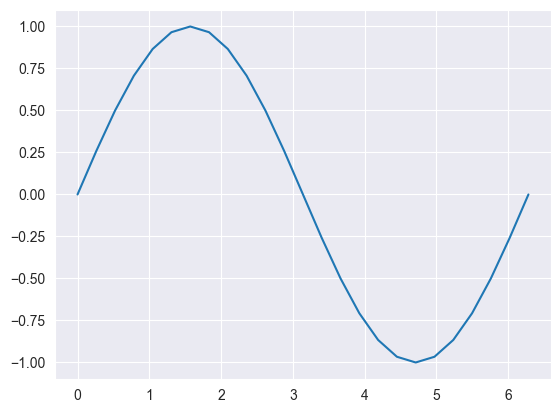

In [26]:
b = torch.sin(a)
print(b)
plt.plot(a.detach(), b.detach())

This ``grad_fn`` gives us a hint that when we execute the
backpropagation step and compute gradients, we’ll need to compute the
derivative of $sin(x)$ for all this tensor’s inputs.

Let’s perform some more computations:

In [27]:
c = 2 * b
print(c)

d = c + 1
print(d)

out = d.sum()
print(out)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)
tensor(25., grad_fn=<SumBackward0>)


In [28]:
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

d:
((<MulBackward0 object at 0x000001B73B163910>, 0), (None, 0))
((<SinBackward0 object at 0x000001B73B163940>, 0), (None, 0))
((<AccumulateGrad object at 0x000001B73B161EA0>, 0),)
()

c:

b:

a:
None


Now we call the `backward()` method on the output, and check the input’s grad property to inspect the gradients:

In [29]:
out.backward()

tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


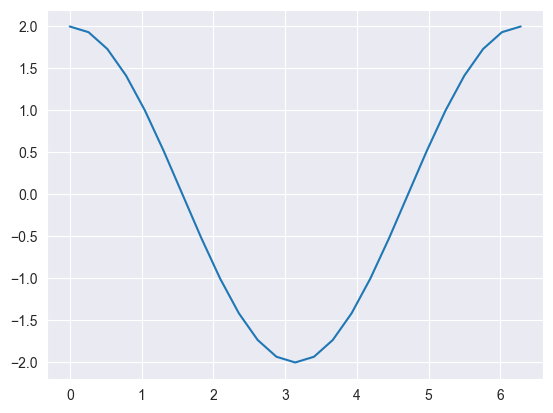

In [34]:
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

Adding a constant, as we did to compute ``d``, does not change the
derivative. That leaves $c = 2 * b = 2 * sin(a)$, the derivative
of which should be $2 * cos(a)$. Looking at the graph above,
that’s just what we see.

# PyTorch Models

Let’s talk about how we can express models in PyTorch

In [35]:
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F  # for the activation function


The most basic type of neural network layer is a linear or fully connected layer. This is a layer where every input influences every output of the layer to a degree specified by the layer’s weights. If a model has m inputs and n outputs, the weights will be an m x n matrix. For example:

In [36]:
lin = torch.nn.Linear(3, 2)
x = torch.rand(5, 3)
print('Input:')
print(x)

print('\n\nWeight and Bias parameters:')
for param in lin.parameters():
    print(param)

y = lin(x)
print('\n\nOutput:')
print(y)

Input:
tensor([[0.7220, 0.8217, 0.2612],
        [0.7375, 0.8328, 0.8444],
        [0.2941, 0.3788, 0.4567],
        [0.0649, 0.6677, 0.7826],
        [0.1332, 0.0023, 0.4945]])


Weight and Bias parameters:
Parameter containing:
tensor([[ 0.2657,  0.1473,  0.2722],
        [-0.5334, -0.3305,  0.0457]], requires_grad=True)
Parameter containing:
tensor([-0.1518, -0.1147], requires_grad=True)


Output:
tensor([[ 0.2322, -0.7593],
        [ 0.3967, -0.7447],
        [ 0.1065, -0.3758],
        [ 0.1769, -0.3342],
        [ 0.0185, -0.1638]], grad_fn=<AddmmBackward0>)


Non-linear activations are what create the complex mappings between the model’s inputs and outputs. They are applied after linear transformations to introduce nonlinearity, helping neural networks learn a wide variety of phenomena.

Here is an example of `nn.ReLU` , but there are other activations to introduce non-linearity in your model.

In [37]:
print(f"Before ReLU: {y}\n\n")
y = nn.ReLU()(y)
print(f"After ReLU: {y}")

Before ReLU: tensor([[ 0.2322, -0.7593],
        [ 0.3967, -0.7447],
        [ 0.1065, -0.3758],
        [ 0.1769, -0.3342],
        [ 0.0185, -0.1638]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.2322, 0.0000],
        [0.3967, 0.0000],
        [0.1065, 0.0000],
        [0.1769, 0.0000],
        [0.0185, 0.0000]], grad_fn=<ReluBackward0>)


`nn.Sequential` is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network.

In [38]:
seq_modules = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=28*28, out_features=20),
    nn.ReLU(),
    nn.Linear(20, 10)
)
input = torch.rand(3,28,28)
logits = seq_modules(input)

The last linear layer of `seq_modules` returns logits - raw values in [-$\infty$, $\infty$]. The logits can be scaled to values [0, 1] representing the model’s predicted probabilities for each class using `nn.Softmax`. 

In [39]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
logits, pred_probab

(tensor([[ 0.2612,  0.3142,  0.2742,  0.1966, -0.0621, -0.0306, -0.1169, -0.0576,
          -0.1512,  0.0722],
         [ 0.2199,  0.2420,  0.3514, -0.0153, -0.0337, -0.1640, -0.2465,  0.0905,
          -0.1450,  0.1040],
         [-0.0015,  0.1157,  0.3965,  0.1984, -0.0923, -0.0405, -0.2201, -0.1834,
          -0.0422,  0.0612]], grad_fn=<AddmmBackward0>),
 tensor([[0.1194, 0.1259, 0.1209, 0.1119, 0.0864, 0.0892, 0.0818, 0.0868, 0.0790,
          0.0988],
         [0.1176, 0.1203, 0.1342, 0.0930, 0.0913, 0.0801, 0.0738, 0.1033, 0.0817,
          0.1048],
         [0.0964, 0.1084, 0.1435, 0.1177, 0.0880, 0.0927, 0.0775, 0.0804, 0.0926,
          0.1027]], grad_fn=<SoftmaxBackward0>))

![LeNet](https://pytorch.org/tutorials/_images/mnist.png)

Above is a diagram of LeNet-5, one of the earliest convolutional neural
nets, and one of the drivers of the explosion in Deep Learning. It was
built to read small images of handwritten numbers (the MNIST dataset),
and correctly classify which digit was represented in the image.

Here’s the abridged version of how it works:

-  Layer C1 is a convolutional layer, meaning that it scans the input
   image for features it learned during training. It outputs a map of
   where it saw each of its learned features in the image. This
   “activation map” is downsampled in layer S2.
-  Layer C3 is another convolutional layer, this time scanning C1’s
   activation map for *combinations* of features. It also puts out an
   activation map describing the spatial locations of these feature
   combinations, which is downsampled in layer S4.
-  Finally, the fully-connected layers at the end, F5, F6, and OUTPUT,
   are a *classifier* that takes the final activation map, and
   classifies it into one of ten bins representing the 10 digits.

How do we express this simple neural network in code?
There is the model we’ll train below. It’s a variant of LeNet adapted for 3-color images.




In [40]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Looking over this code, you should be able to spot some structural
similarities with the diagram above.

This demonstrates the structure of a typical PyTorch model: 

-  It inherits from ``torch.nn.Module`` - modules may be nested - in fact,
   even the ``Conv2d`` and ``Linear`` layer classes inherit from
   ``torch.nn.Module``.
-  A model will have an ``__init__()`` function, where it instantiates
   its layers, and loads any data artifacts it might
   need (e.g., an NLP model might load a vocabulary).
-  A model will have a ``forward()`` function. This is where the actual
   computation happens: An input is passed through the network layers
   and various functions to generate an output.
-  Other than that, you can build out your model class like any other
   Python class, adding whatever properties and methods you need to
   support your model’s computation.

Let’s instantiate this object and run a sample input through it.




In [41]:
net = Net()
print(net)                         # what does the object tell us about itself?

input = torch.rand(1, 3, 32, 32)   # stand-in for a 32x32 black & white image
print('\nImage batch shape:')
print(input.shape)

output = net(input)                # we don't call forward() directly
print('\nRaw output:')
print(output)
print(output.shape)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:
torch.Size([1, 3, 32, 32])

Raw output:
tensor([[-0.1174,  0.0210, -0.0846, -0.0665,  0.0792, -0.1173,  0.1101,  0.0412,
          0.0462,  0.1337]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


A loss function takes the (output, target) pair of inputs, and computes a
value that estimates how far away the output is from the target.

There are several different
[loss functions](https://pytorch.org/docs/nn.html#loss-functions) under the
nn package .
A simple loss is: ``nn.MSELoss`` which computes the mean-squared error
between the output and the target.

For example:

In [42]:
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.4392, grad_fn=<MseLossBackward0>)


To backpropagate the error all we have to do is to ``loss.backward()``.
You need to clear the existing gradients though, else gradients will be
accumulated to existing gradients.


Now we shall call ``loss.backward()``, and have a look at conv1's bias
gradients before and after the backward.

In [43]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([ 0.0004,  0.0043, -0.0018,  0.0008, -0.0166, -0.0036])


Below, we’re going to use one of the ready-to-download,
open-access datasets from TorchVision. The first thing we need to do is transform our incoming images into a
PyTorch tensor.




In [44]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

Here, we specify two transformations for our input:

-  ``transforms.ToTensor()`` converts images loaded by Pillow into 
   PyTorch tensors.
-  ``transforms.Normalize()`` adjusts the values of the tensor so
   that their average is zero and their standard deviation is 0.5. Most
   activation functions have their strongest gradients around x = 0, so
   centering our data there can speed learning.

There are many more transforms available, including cropping, centering,
rotation, and reflection.

Next, we’ll create an instance of the CIFAR10 dataset. This is a set of
32x32 color image tiles representing 10 classes of objects: 6 of animals
(bird, cat, deer, dog, frog, horse) and 4 of vehicles (airplane,
automobile, ship, truck):




In [45]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:42<00:00, 4046395.14it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data


 ``Dataset`` classes in PyTorch include the
downloadable datasets in TorchVision, Torchtext, and TorchAudio, as well
as utility dataset classes such as ``torchvision.datasets.ImageFolder``,
which will read a folder of labeled images. You can also create your own
subclasses of ``Dataset``.

When we instantiate our dataset, we need to tell it a few things:

-  The filesystem path to where we want the data to go. 
-  Whether or not we are using this set for training; most datasets
   will be split into training and test subsets.
-  Whether we would like to download the dataset if we haven’t already.
-  The transformations we want to apply to the data.

Once your dataset is ready, you can give it to the ``DataLoader``:




In [46]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

A ``Dataset`` subclass wraps access to the data, and is specialized to
the type of data it’s serving. The ``DataLoader`` knows *nothing* about
the data, but organizes the input tensors served by the ``Dataset`` into
batches with the parameters you specify.




 ship   car  frog   dog


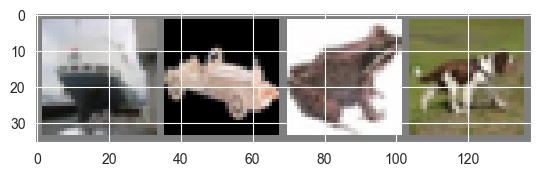

In [47]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

Let’s put all the pieces together, and train a model:




In [48]:
import torch.optim as optim

The last ingredients we need are a loss function and an optimizer:




In [49]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Here we have created an
optimizer that implements *stochastic gradient descent*. Besides parameters of the
algorithm, like the learning rate (``lr``) and momentum, we also pass in
``net.parameters()``, which is a collection of all the learning weights
in the model - which is what the optimizer adjusts.

Finally, all of this is assembled into the training loop:




In [50]:
net.to(my_device)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.to(my_device))
        loss = criterion(outputs, labels.to(my_device))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.175
[1,  4000] loss: 1.808
[1,  6000] loss: 1.633
[1,  8000] loss: 1.556
[1, 10000] loss: 1.487
[1, 12000] loss: 1.443
[2,  2000] loss: 1.356
[2,  4000] loss: 1.359
[2,  6000] loss: 1.305
[2,  8000] loss: 1.300
[2, 10000] loss: 1.262
[2, 12000] loss: 1.257
Finished Training


As a final step, we should check that the model is actually doing
*general* learning, and not simply “memorizing” the dataset. Download CIFAR10 `testset`, dedine the `testloader` and calculate the accuracy.




In [65]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                          shuffle=True, num_workers=2)
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = softmax(net(inputs.to(my_device))).argmax(dim=1)
        for i in range(outputs.shape[0]):
            total += 1
            if outputs[i] == labels[i]:
                correct += 1

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 52 %


You should see that the model is roughly 50%
accurate at this point. That’s not exactly state-of-the-art, but it’s
far better than the 10% accuracy we’d expect from a random output. This
demonstrates that some general learning did happen in the model. We are going to improve the performance through next practical sessions.


